In [1]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [2]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Dans ce jeu de données, l'on retrouve des variables relatives à la démographie (population, salaire, occupation des maisons), à la position géographique (longitude, latitude), et aux caractéristiques des maisons (âge, nombre de pièces, nombre de chambres). Ces statistiques étant prises à l'échelle de districts, elles ont été agrégées en valeur moyenne ou médiane.

In [3]:
california_housing.target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


La variable cible a également été agrégée en valeur médiane.

Étant donné que toutes les variables sont quantitatives, nous sommes face à un problème de régression.

In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Le jeu de données est composé de 9 variables numériques, 20640 entrées et ne comporte aucune valeur manquante.

Intéressons nous à la distribution des variables :

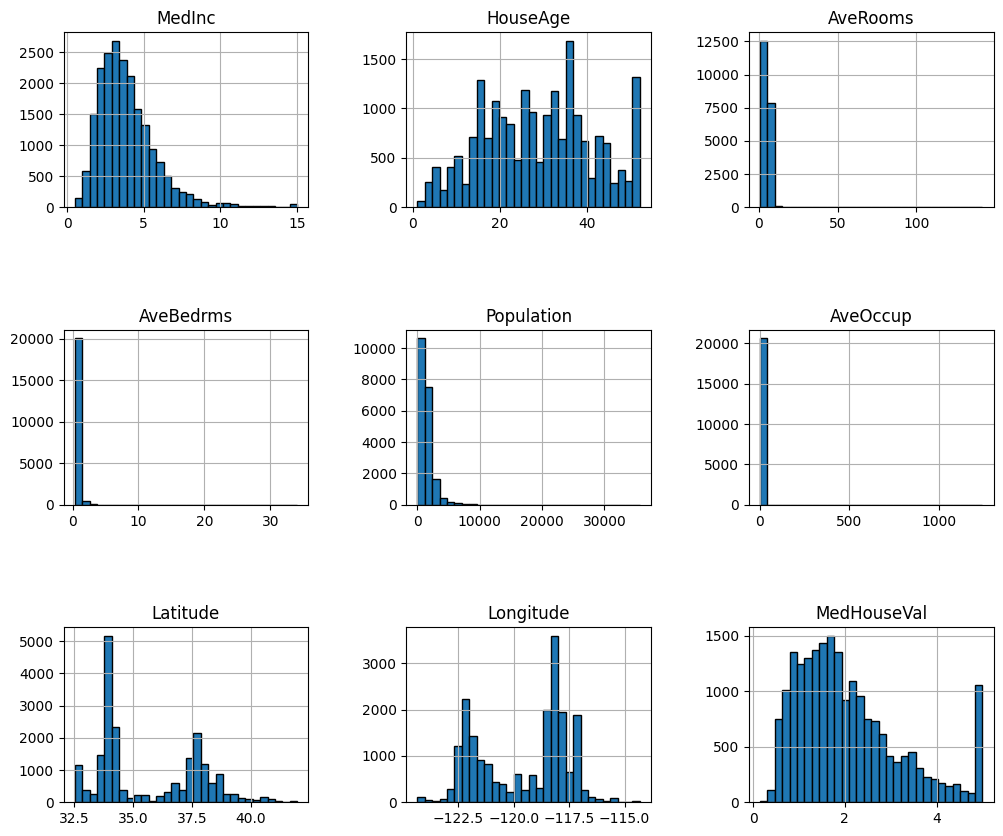

In [ ]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

- La distribution du salaire médian est plus ou moins normale, avec quelques personnes ayant un salaire bien au-dessus de la moyenne.

- L'âge médian des maisons est plus ou moins uniformément distribué.

- Le prix médian des maisons semble être distribué normalement, mais l'on note quand-même un nombre élevé de maisons parmi les plus chères valant plus de 400K $.

- Quant aux autres variables comme le nombre de chambres, le nombre de pièces, la population et l'occupation moyenne, il semble avoir une faible proportion de valeurs élevées et faibles, donc potentiellement des valeurs aberrantes.

Intéressons nous à ces dernières features :

In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


Pour chacune de ces features, lorsqu'on compare la valeur maximale au troisième quartile, l'on note une large différence. Ceci confirme bien qu'elles contiennent quelques valeurs extrêmes.

Jusqu'ici, nous n'avons pas tenu compte de la longitude ni de la latitude. Il serait intéressant de voir si ces variables géographiques peuvent être associées à des prix de maisons élevés.

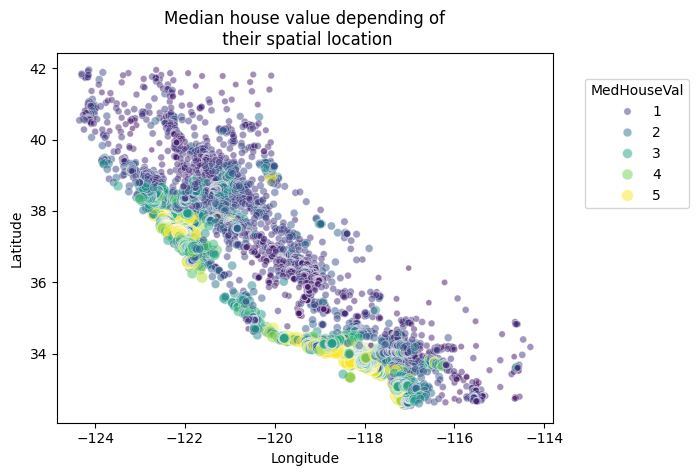

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

En regardant le graphique ci-dessus, l'on peut voir que les maisons les plus chères sont beaucoup plus concentrées sur la côte, dans les zones de plus faible latitude et de plus forte longitude.

Ainsi, pour prédire le prix médian des maisons, l'on peut prendre en compte la latitude et la longitude pour combler l'effet potentiel des valeurs extrêmes sur la qualité de la prédiction.